# Factorial Experimental Designs
## Incorporating Additional Treatment Factors into Our Experiments
### Dr Austin R Brown
### School of Data Science and Analytics
#### Kennesaw State University

In [ ]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
#github_username = "abrown9008"

# 2. Name of the repo (don't change unless your fork name is different)
#repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
#repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
#cwd = os.getcwd()
#if cwd.endswith(repo_name):
#    print(f"✅ Already inside repo folder: {cwd}")
#else:
    # --- If the repo folder exists, check if it's nested ---
#    if os.path.exists(repo_name):
#        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
#    else:
#        print(f"📥 Cloning repo from {repo_url}...")
#        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
#    if os.path.exists(repo_name):
#        os.chdir(repo_name)
#        print(f"📂 Changed directory to: {os.getcwd()}")
#    else:
#        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
#remote_url = os.popen("git config --get remote.origin.url").read().strip()

#if "abrown9008" in remote_url:
#   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
#    print("💡 Please fork the repo to your own account and update `github_username` above.")
#else:
#    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

#today_dir = "Factorial Designs"
#os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

## Introduction

- So far, we have discussed experimental situations in which we are interested in the levels of a single treatment factor.

- All of our designs, including CRD, RBD, and LSD only have one treatment factor.

    - And of course, 0, 1, and 2 blocking factors, respectively.

- But could there be instances where we are interested in the effects of two or more treatment factors?

    - Let's consider an example:

### Experiment Example: American Football Helmets

- In American football, players are required to wear helmets as a means of protecting their head and face from a variety of potential injuries. One of the biggest head injury risks a player faces during game play is a concussion. It is in the interest of players at all levels to reduce this risk both in terms of the rules of the game as well as the quality of the equipment.

- Suppose a football equipment manufacturer is developing new helmet technology aimed at reducing concussion risk. They want to investigate the effectiveness of two design features:

    1. **Outer Helmet Material**: (1) Traditional Polycarbonate and (2) New Composite
    2. **Internal Padding System**: (1) Standard Foam Padding and (2) Advanced Gel-Based Padding

- The manufacturer creates four different helmet prototypes, one for each combination of the two factors. To collect data, they set up a standardized rig where a stationary helmet is struck by a mechanically controlled mallet at a fixed speed, simulating the forces experienced during a head-on collision (check out this [**video**](https://www.youtube.com/watch?v=mWCxEhBR88k) for a visual example).

- Inside the helmet, a force sensor records the amount of force transmitted by the below to inside the helmet (measured in G-Force).

- For this experiment, the manufacturer produced 10 of the four prototypes for minimizing replication error. The data are contained in the `Football Helmet.xlsx` file.

### Designing the Experiment

- As with all of our examples, we can list out our

    1. **Outcome:** G-Forces measured inside the helmet after being struck
    2. **Treatments:** Outer Helmet Material *and* Internal Padding System
    3. **Potential Lurking Variables:** Could happen if we have different operators conducting the runs of the experiment

- Next, we need to decide on the design. Here, we have two treatment variables (i.e., independent variables) and no blocking/confounding/lurking variables.

    - So what's our design?

### Completely Randomized Two-Factor Design

- In this case, because we have two treatment factors and no blocking factors, our experimental design would be a ***Completely Randomized Two-Factor Design***.

- As before, we can represent the design mathematically:

$$ y_{ijk} = \mu + \alpha_i + \beta_j + (\alpha\beta)_{ij} + \varepsilon_{ijk} $$

- You may be asking yourself, "Self, how does this conceptually differ from RBD?" Great question!

- The answer is subtle. In RBD and LSD, we assumed the blocking factors didn't interact with the treatment factor (or each other in the case of LSD).

    - In this two-factor design, we are assuming that there may be an **interaction** between Treatment 1 (denoted by $\alpha$) and Treatment 2 (denoted by $\beta$).

- This interaction effect is denoted by $(\alpha\beta)_{ij}$.

- Additionally, in RBD and LSD, we completely ignored the F-tests associated with the blocking factors.

- In this two-factor design, we are interested in the test for both treatments as well as their interactions.

- Let's take a look at the data and start working through this example in a similar manner to what we've done before.

### Descriptive Analysis: Summary Statistics

- Let's start by examining the means and standard deviations of the Shell type:

In [ ]:
## Import pandas library ##
import pandas as pd

## Import Football Helmet.xlsx File ##

helmet = pd.read_excel("Football Helmet.xlsx")

## Data Integrity Check ##

print(helmet.info())

## Calculate Means & SDs of Shell Type ##

shell_stats = helmet.groupby("Shell")['Response'].agg(['mean','std'])

print(shell_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Shell     40 non-null     object 
 1   Padding   40 non-null     object 
 2   Response  40 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.1+ KB
None
                 mean        std
Shell                           
New Composite  77.927  20.955868
Polycarbonate  94.508  24.445158


- We can see that in general, regardless of Padding type, the New Composite helmets experience a substantially lesser force compared to the Polycarbonate helmets.

    - This may indicate this shell-type is better at limiting head injuries.

- Let's check out the Padding type now:

In [ ]:
## Means and Standard Deviations for Padding Type ##

pad_stats = helmet.groupby("Padding")["Response"].agg(['mean','std'])

print(pad_stats)

           mean        std
Padding                   
Foam     98.055  23.434041
Gel      74.380  18.364550


- Here, we can see that the Gel padding type has a substantially lower force experienced compared to the Foam padding type.

- But here, unlike the cases we saw with one-factor RBD and LSD, we assume that our two treatment factors may have an interaction effect with one another.

- We can observe this effect both in the summary statistics as well as data visualizations.

    - Let's first check out the summary statistics!

In [ ]:
## Interaction Effect Summary Stats ##

int_stats = helmet.groupby(['Shell','Padding'])['Response'].agg(['mean','std'])

print(int_stats)

                          mean        std
Shell         Padding                    
New Composite Foam      84.438  23.699047
              Gel       71.416  16.469344
Polycarbonate Foam     111.672  13.624626
              Gel       77.344  20.523747


- Observing the interactions, we can see that the polycarbonate helmets generally experience the greatest force but the gel padding does reduce the force experienced for both shell types.

- If there **is not** a significant interaction, then the change in the mean response between the Shell types would be roughly equivalent regardless of Padding type.

    - In other words, the difference between New Composite/Gel and Polycarbonate/Gel would be the same as what's observed between New Composite/Foam and Polycarbonate/Foam.

- If there is evidence for a significant interaction, then the change in the mean response between the Shell types would be different depending on the type of Padding.

    - In other words, the difference between New Composite/Gel and Polycarbonate/Gel would be meaningfully different compared to what's observed between New Composite/Foam and Polycarbonate/Foam.
    
    - We seem to be observing this here and may potentially suggest a meaningful interaction between our two treatment effects. 

### Descriptive Analysis: Boxplot/Interaction Plot Combo

- As before, we can use boxplots to visually assess the same information we generated tabularly:

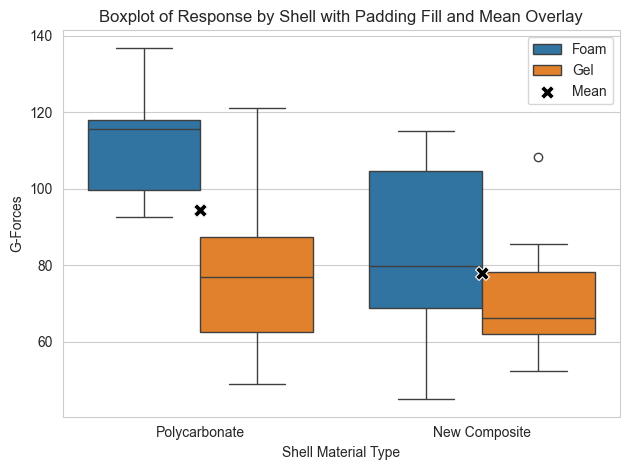

In [ ]:
## Import seaborn and matplot lib ##

import seaborn as sns
import matplotlib.pyplot as plt

## Create the boxplot using seaborn. ##

sns.set_style("whitegrid")

sns.boxplot(
    data=helmet,
    x='Shell',
    y='Response',
    hue='Padding'
)

## Calculate Means Per Shell ##

mean_points = helmet.groupby('Shell')['Response'].mean().reset_index()

## Overlay Mean Points ##

sns.scatterplot(data=mean_points,x="Shell",y="Response",
                marker='X',s=100,color='black',label='Mean',
                zorder=3)

## Add labels and titles ##

plt.title('Boxplot of Response by Shell with Padding Fill and Mean Overlay')
plt.ylabel('G-Forces')
plt.xlabel('Shell Material Type')
plt.legend()
plt.tight_layout()
plt.show()



- Here, the "X" between the boxes denotes the mean of the Shell.
    
    - Clearly, the Polycarbonate shell has a greater mean, as we saw in the summary statistics.

- We can also see that the Foam padding in the Polycarbonate shell had a greater force experienced compared to the Foam padding in the New Composite shell.

    - This may indicate a possible interaction effect between shell and padding type.

- To better examine the interaction effect, we can use an interaction plot!

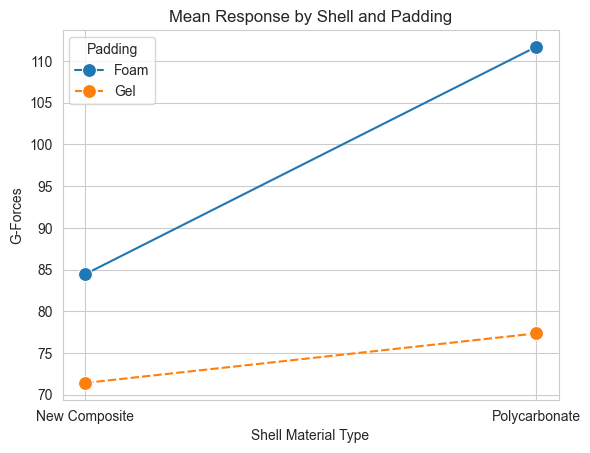

In [ ]:
## First, let's grab the interaction means ##

int_means = helmet.groupby(['Shell','Padding'])['Response'].mean().reset_index()

## Next, Create Interaction Plot with Seaborn ##

sns.set_style('whitegrid')

sns.lineplot(data=int_means,
             x='Shell',
             y='Response',
             hue='Padding',
             marker='o',
             markersize=10,
             style='Padding')


## Add Titles and Labels ##

plt.title('Mean Response by Shell and Padding')
plt.ylabel('G-Forces')
plt.xlabel('Shell Material Type')
plt.show()

- Let's take a step back and think more generally about what an *interaction* is really referring to in context.

- Here, we're ultimately asking: does the Padding type change the force experienced differently depending on the Shell type?
    
    - In other words, does foam/gel work better with polycarbonate or new composite?

- If the answer to this question is "no," then the prior plot will show us two parallel lines. If the lines are *not* parallel, then this may indicate the presence of a significant interaction.

![Interaction Plot Example](Factorial%20Designs/Interaction%20Plots.png)

- As an aside, you can combine these plots into what I call a "Combo Plot" using `seaborn` and `matplotlib`:

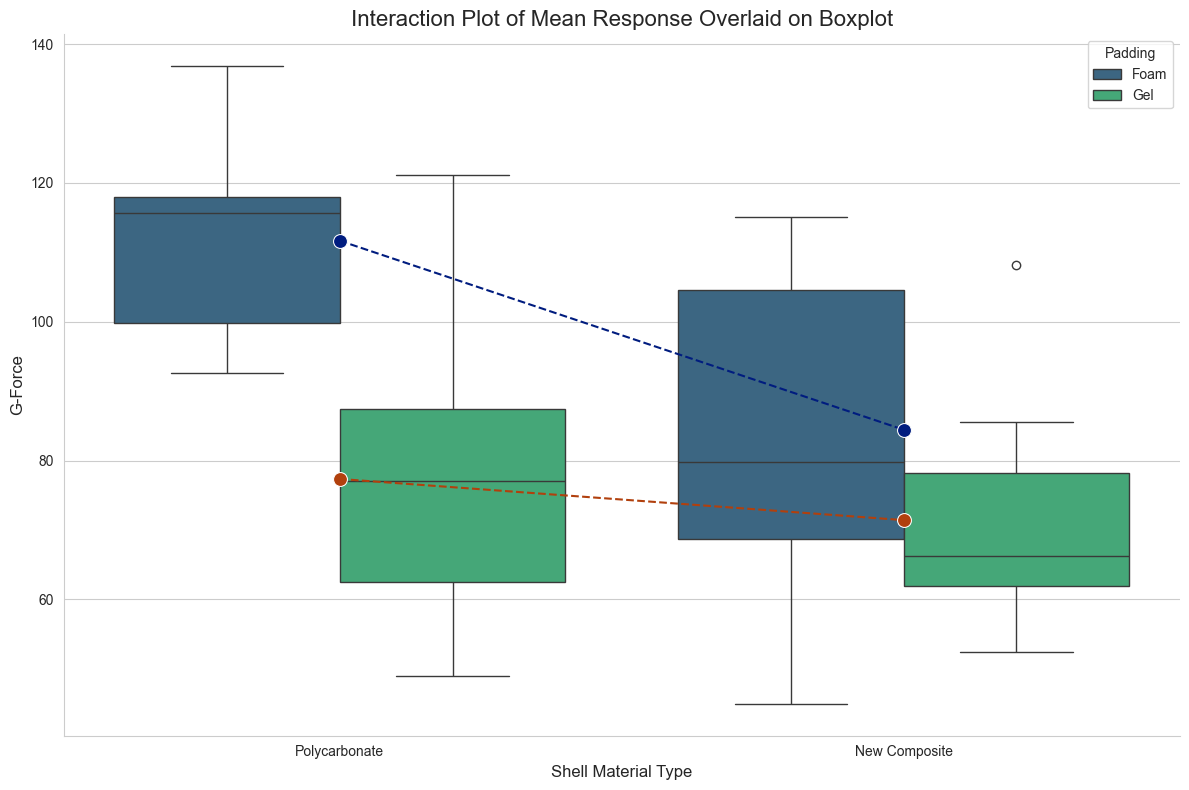

In [41]:
## Step 1: Create a figure and a single axes object to plot on. ##

fig, ax = plt.subplots(figsize=(12, 8))

## Step 2: Plot the boxplot first, on the raw data.
## We set 'ax=ax' to ensure it's drawn on our specified axes.
## 'dodge=True' separates the boxes for different padding types.
## 'zorder=2' places it below the line plot. ##

sns.boxplot(data=helmet, x='Shell', y='Response', hue='Padding',
            palette='viridis', dodge=True, ax=ax, zorder=2)

## Step 3: Overlay the interaction plot (line plot of the means).
## Seaborn's lineplot() can automatically calculate the mean for each group.
## We use the same 'x', 'y', and 'hue' to ensure alignment.
## We specify 'marker' to show the points at the means.
## 'zorder=3' places it on top of the boxplot for better visibility.

sns.lineplot(data=helmet, x='Shell', y='Response', hue='Padding',
             marker='o', markersize=10, ax=ax, zorder=3,
             estimator='mean', err_style=None, linestyle='--',
             palette='dark')

## Note: The `err_style=None` and `estimator='mean'` parameters in lineplot()
## ensure that it plots just the mean line without confidence intervals. ##

## Step 4: Clean up the plot: set titles, labels, and theme. ##

ax.set_title('Interaction Plot of Mean Response Overlaid on Boxplot', fontsize=16)
ax.set_xlabel('Shell Material Type', fontsize=12)
ax.set_ylabel('G-Force', fontsize=12)

## Adjust legend to avoid duplicate labels ##
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title='Padding')

## Apply a classic theme by removing the top and right spines. ##

sns.despine()
plt.tight_layout()

## Show Plot ##

plt.show()

## Inferential Analysis

- Now that we have performed our appropriate descriptive analyses, we can go ahead and perform our inferential analyses in basically the same manner as before, beginning with the specification of our statistical hypotheses.

- Here, since we have two treatment effects and an interaction effect that are part of our experiment, we technically have three sets of statistical hypotheses we test.

- **Shell Type**: $H_0: \alpha_{\text{Polycarbonate}} = \alpha_{\text{New Composite}} = 0$ vs. $H_1: \alpha_{\text{Polycarbonate}}$ or $\alpha_{\text{New Composite}}$ do not equal 0.

- **Padding Type**: $H_0: \beta_{\text{Foam}} = \beta_{\text{Gel}} = 0$ vs. $H_1: \beta_{\text{Foam}}$ or $\beta_{\text{Gel}}$ do not equal 0.

- **Interaction**: $H_0: (\alpha\beta)_{PF} = (\alpha\beta)_{PG} = (\alpha\beta)_{NF} = (\alpha\beta)_{NG} = 0$ vs. $H_1:$ at least one of these do not equal 0.

- You may be asking yourself "why are the hypotheses laid out this way, with respect to the effects rather than the means?"

- **The answer:** this is what is actually being tested in the F-tests. Since we can write the treatment and interaction group means as functions of these effects, it is sufficient (and traditional) to focus on the effects.

- But to reiterate, because the effects are functions of the group means, we can still think of these tests as being related to the group means, because they are!

- Here is our ANOVA table for a two treatment effect design:

| Source | df | SS | MS | F-Statistic |
| :--- | :--- | :--- | :--- | :--- |
| A | $I-1$ | $SSA$ | $SSA/(I-1)$ | $MSA/MSE$ |
| B | $J-1$ | $SSB$ | $SSB/(J-1)$ | $MSB/MSE$ |
| AB | $(I-1)(J-1)$ | $SSAB$ | $\frac{SSAB}{(I-1)(J-1)}$ | $MSAB/MSE$ |
| Error | $(r-1)IJ$ | $SSE$ | $\frac{SSE}{(r-1)IJ}$ | |
| Total | $rIJ - 1$ | $SST$ | | |

- Let's go ahead and build our model, check the assumptions, and produce our ANOVA table:

In [ ]:
## Import relevant statsmodels and scipy functions ##
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

## Fit the ANOVA Model ##

mod = ols('Response~Shell*Padding',data=helmet).fit()

print(sm.stats.anova_lm(mod,typ=3))